In [114]:
# Basic imports for analysis

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [115]:
# Setting Seaborn Style

sns.set_theme()
sns.set_style('ticks')
sns.set_palette('icefire')

In [116]:
# Reading in the student data file

data = pd.read_csv('StudentsPerformance.csv')

In [117]:
#Identifying columns and data types

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [118]:
# Checking missing values and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


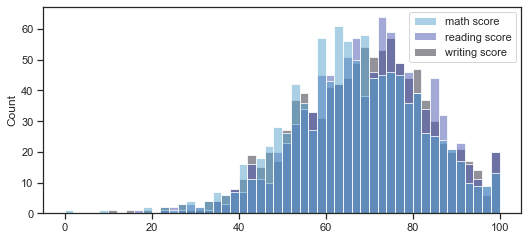

In [119]:
# Exploring distributions of math, reading, and writing scores

sns.histplot(data = data, bins=50)
plt.savefig('plots/score dist combined')
plt.show()

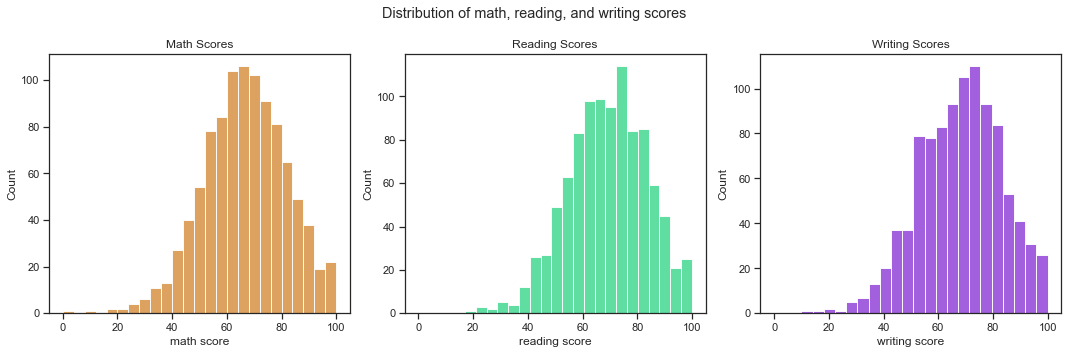

In [120]:
# Creating separate distributions for each score set

fig, ax = plt.subplots(1,3, sharex=True, figsize = (15,5))
fig.suptitle('Distribution of math, reading, and writing scores')
sns.histplot(ax = ax[0], data = data['math score'], color = '#d4832b')
ax[0].set_title('Math Scores')
sns.histplot(ax = ax[1], data = data['reading score'], color = '#2BD483')
ax[1].set_title('Reading Scores')
sns.histplot(ax = ax[2], data = data['writing score'], color = '#832BD4')
ax[2].set_title('Writing Scores')
plt.savefig('plots/seprate score distributions')

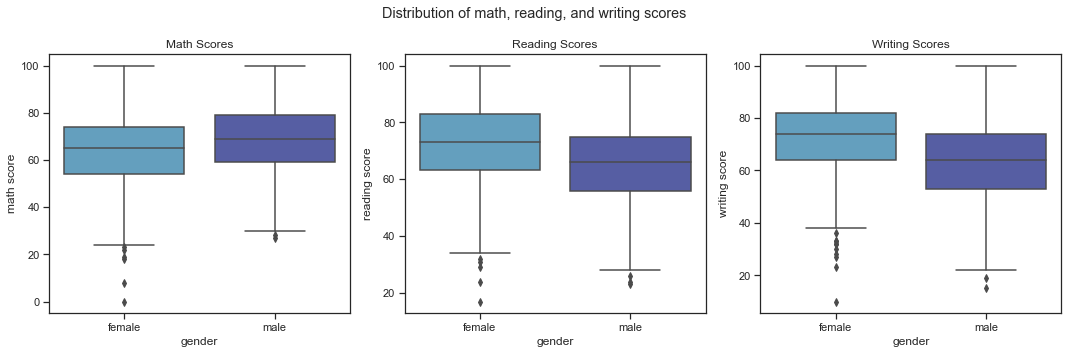

In [121]:
# Checking boxplot distributions based on gender

fig, ax = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Distribution of math, reading, and writing scores')
sns.boxplot(ax = ax[0], x="gender", y="math score", data=data)
ax[0].set_title('Math Scores')
sns.boxplot(ax = ax[1], x="gender", y="reading score", data=data)
ax[1].set_title('Reading Scores')
sns.boxplot(ax = ax[2], x="gender", y="writing score", data=data)
ax[2].set_title('Writing Scores')
plt.savefig('plots/score box plots')
plt.show()

In [122]:
print(data['parental level of education'].value_counts())

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [123]:
# Changing parental level of education to categorical data for ordering of histogram
data['parental level of education'] = pd.Categorical(data['parental level of education'], 
                                                            ["some high school",
                                                            "high school",
                                                            "some college",
                                                            "associate's degree",
                                                            "bachelor's degree",
                                                            "master's degree" ])

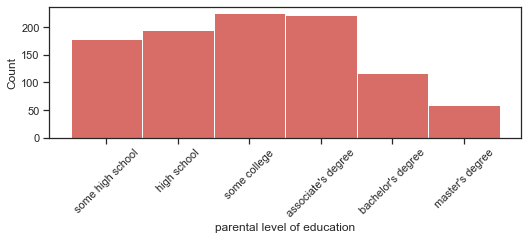

In [124]:
# Creating a histogram of parent education

g = sns.histplot(data = data, x = 'parental level of education', color = '#cb3b34')
plt.xticks(rotation = 45)
plt.savefig('plots/parental level of education')
plt.show()

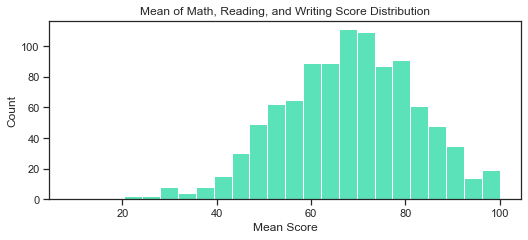

In [125]:
# Calculating average scores and then displaying distribution

data['mean_score'] = (data['math score'] + data['reading score'] + data['writing score'])/3
sns.histplot(data = data, x = 'mean_score', color = '#26d9a0')
plt.xlabel('Mean Score')
plt.title('Mean of Math, Reading, and Writing Score Distribution')
plt.savefig('plots/mean score distribution')
